In [33]:
#### confrontiamo le aree delle roc ottenute con i diversi modelli
#### procediamo in questo modo:
### 1-fissiamo un valore di max depth [-1,30,300,3000]
### 2-fissiamo un valore n_estimators [30,300,3000]
### 3-riempiamo una matrice con i valori delle ROC area
### le colonne si riferiscono al numero di leaves e le righe si riferiscono al numero minimo di dati nei leaves
### 4-ripetiamo il punto 3 per tutti numeri di estimatori
### 5-ripetiamo i punti2-4 per tutte le max depth

In [34]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.colors as mcolors

### ci scriviamo il path in cui sono salvati i modelli
path_dir = '/home/private/Hepd/Dataset_4/bdt'

### definiamo le liste con i valori dei parametri
list_n_estimators = [30, 300, 3000]
list_max_depths = [-1, 30, 300, 3000]

list_num_leaves = [30, 300, 3000]
list_min_data_in_leaves = [30, 300, 3000]

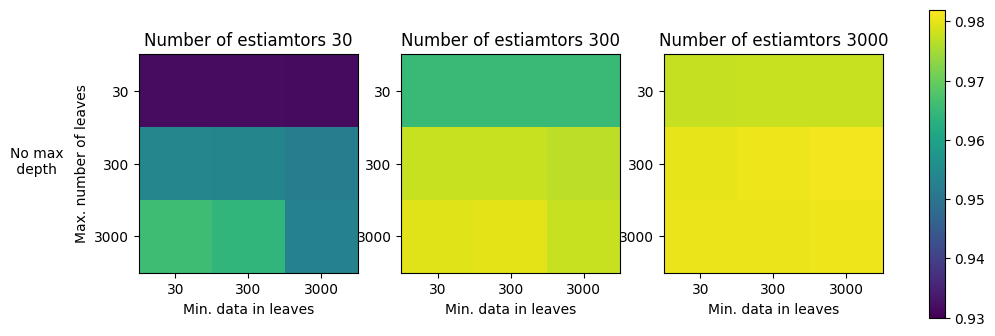

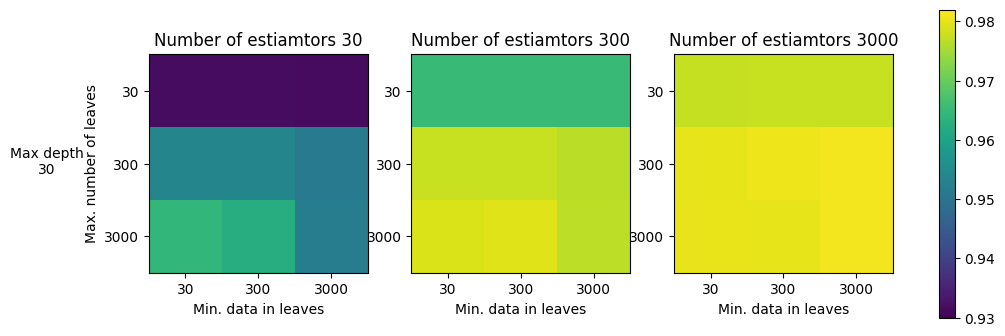

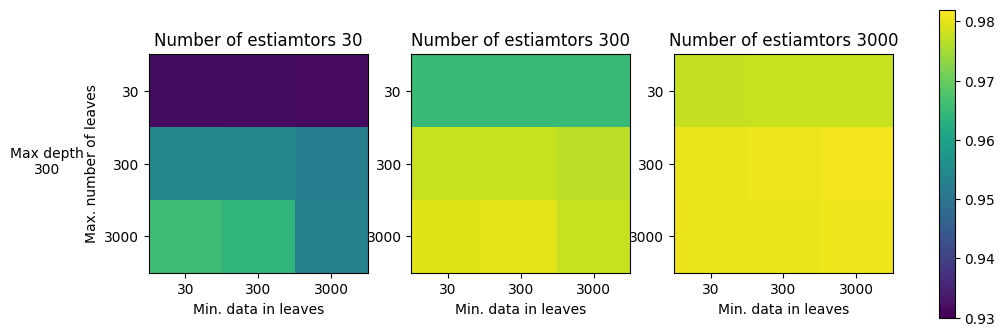

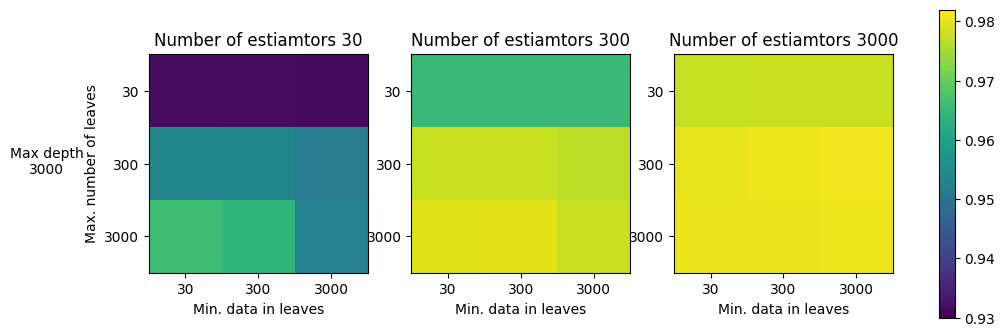

In [50]:
### cicliamo sulle max_depth
for i,depth in enumerate(list_max_depths):
    ### definiamo la figure in cui plotteremo le matrici, che saranno plottate a gruppi di tre
    fig, axs = plt.subplots(1, 3, figsize = (12,4))
    # Titolo generale per tutte le matrici sul lato sinistro
    if depth == -1 : depth_label = 'No max\n depth '
    else : depth_label = f'Max depth\n{depth}' 
    fig.text(0.04, 0.5, depth_label, va='center', ha='center', rotation='horizontal')
    ### cicliamo sul numero di estimatori
    for j,n_estimators in enumerate(list_n_estimators):
        ### definiamo la matrice vuota da plottare
        roc_area_matrix = np.zeros((len(list_num_leaves),len(list_min_data_in_leaves)))
        ### cicliamo sul numero di final leaves
        for k,num_leaves in enumerate(list_num_leaves):
            ### cicliamo sul numero di min data in leaves
            for l,min_data in enumerate(list_min_data_in_leaves):
                ### definiamo il path del file con l'area della roc
                file_path =path_dir+'/n_estimators_'+str(n_estimators)+'_max_depth_'+str(depth)+'_n_leaves_'+str(num_leaves)+'_min_data_leaf_'+str(min_data)+'/n_estimators_'+str(n_estimators)+'_max_depth_'+str(depth)+'_n_leaves_'+str(num_leaves)+'_min_data_leaf_'+str(min_data)+'_ROC_area_probabilities_1.txt'
                ### questi file sono di una riga che termina con un float che è l'area della roc
                with open(file_path, 'r') as f:
                    line = f.readline()
                ### salviamo il valore della roc nella matrice
                roc_area_matrix[k][l] = float(line.split()[-1])
        cax = axs[j].imshow(roc_area_matrix, vmin = 0.93, vmax = 0.982, cmap='viridis')
        axs[j].set_xticks([0,1,2])
        axs[j].set_xticklabels(['30', '300', '3000'])
        axs[j].set_yticks([0,1,2])
        axs[j].set_yticklabels(['30', '300', '3000'])
        axs[j].set_xlabel('Min. data in leaves')
        axs[0].set_ylabel('Max. number of leaves')
        axs[j].set_title(f'Number of estiamtors {n_estimators}')
    fig.colorbar(cax, ax=axs)
    fig.savefig('/home/private/Hepd/Dataset_4/models_evaluation/bdt/performance_depth_'+str(depth)+'.jpg')

In [36]:
#### ora fcciamo la stessa cosa ma con le aree dele roc fatte sul train set

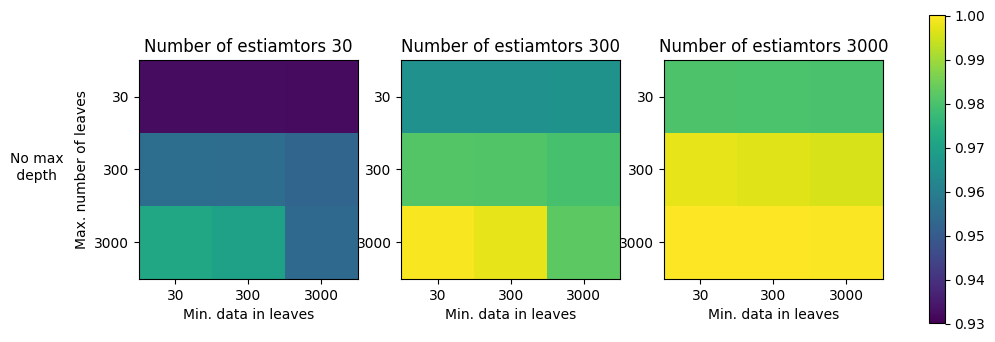

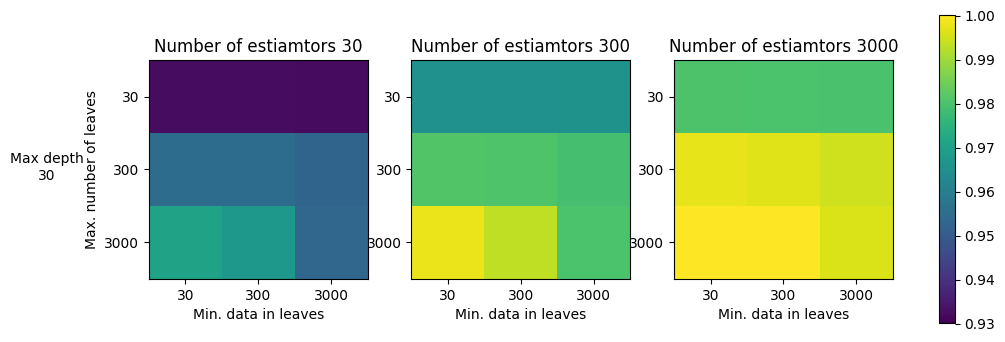

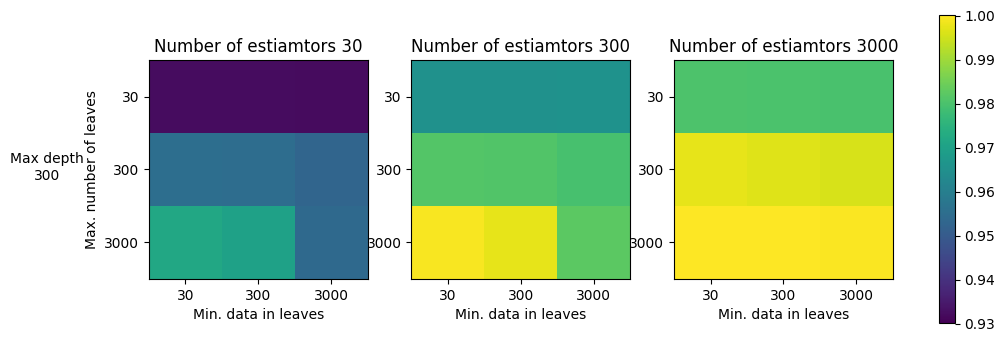

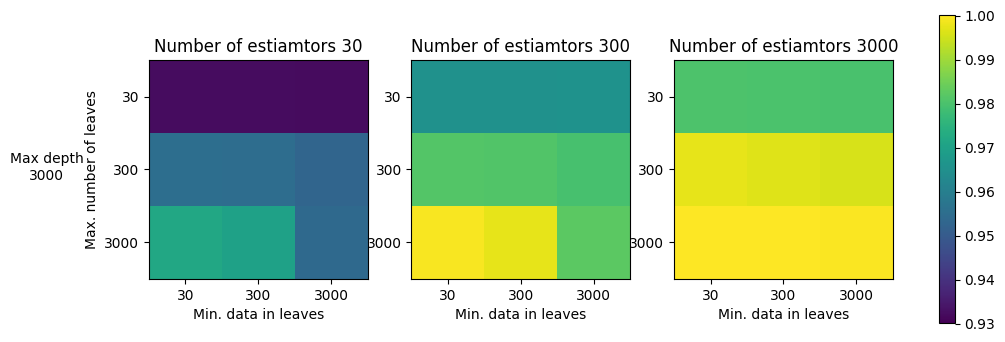

In [49]:
### cicliamo sulle max_depth
for i,depth in enumerate(list_max_depths):
    ### definiamo la figure in cui plotteremo le matrici, che saranno plottate a gruppi di tre
    fig, axs = plt.subplots(1, 3, figsize = (12,4))
    # Titolo generale per tutte le matrici sul lato sinistro
    if depth == -1 : depth_label = 'No max\n depth '
    else : depth_label = f'Max depth\n{depth}' 
    fig.text(0.04, 0.5, depth_label, va='center', ha='center', rotation='horizontal')
    ### cicliamo sul numero di estimatori
    for j,n_estimators in enumerate(list_n_estimators):
        ### definiamo la matrice vuota da plottare
        roc_area_matrix = np.zeros((len(list_num_leaves),len(list_min_data_in_leaves)))
        ### cicliamo sul numero di final leaves
        for k,num_leaves in enumerate(list_num_leaves):
            ### cicliamo sul numero di min data in leaves
            for l,min_data in enumerate(list_min_data_in_leaves):
                ### definiamo il path del file con l'area della roc
                file_path =path_dir+'/n_estimators_'+str(n_estimators)+'_max_depth_'+str(depth)+'_n_leaves_'+str(num_leaves)+'_min_data_leaf_'+str(min_data)+'/n_estimators_'+str(n_estimators)+'_max_depth_'+str(depth)+'_n_leaves_'+str(num_leaves)+'_min_data_leaf_'+str(min_data)+'_train_ROC_area_probabilities_1.txt'
                ### questi file sono di una riga che termina con un float che è l'area della roc
                with open(file_path, 'r') as f:
                    line = f.readline()
                ### salviamo il valore della roc nella matrice
                roc_area_matrix[k][l] = float(line.split()[-1])
        cax = axs[j].imshow(roc_area_matrix,vmin = 0.93,vmax = 1.00, cmap='viridis')
        axs[j].set_xticks([0,1,2])
        axs[j].set_xticklabels(['30', '300', '3000'])
        axs[j].set_yticks([0,1,2])
        axs[j].set_yticklabels(['30', '300', '3000'])
        axs[j].set_xlabel('Min. data in leaves')
        axs[0].set_ylabel('Max. number of leaves')
        axs[j].set_title(f'Number of estiamtors {n_estimators}')
    fig.colorbar(cax, ax=axs)
    fig.savefig('/home/private/Hepd/Dataset_4/models_evaluation/bdt/performance_depth_'+str(depth)+'_train_dataset.jpg')

In [38]:
###### facciamo la stessa cosa con la ifferenza delle roc aree

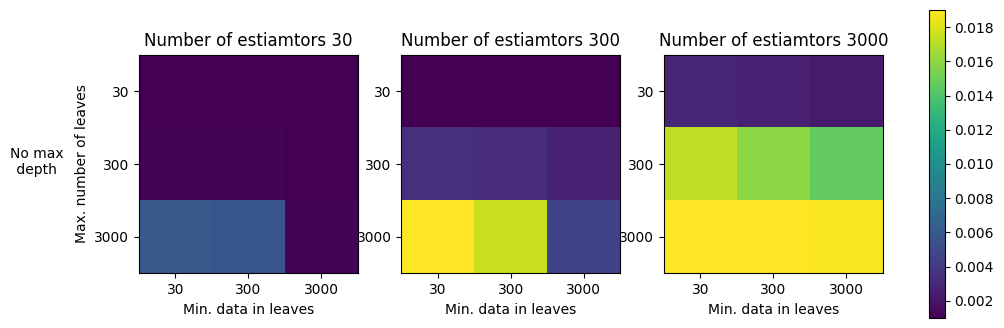

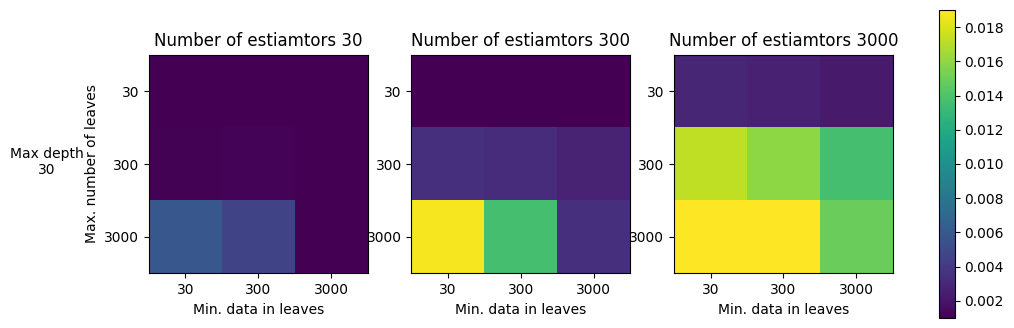

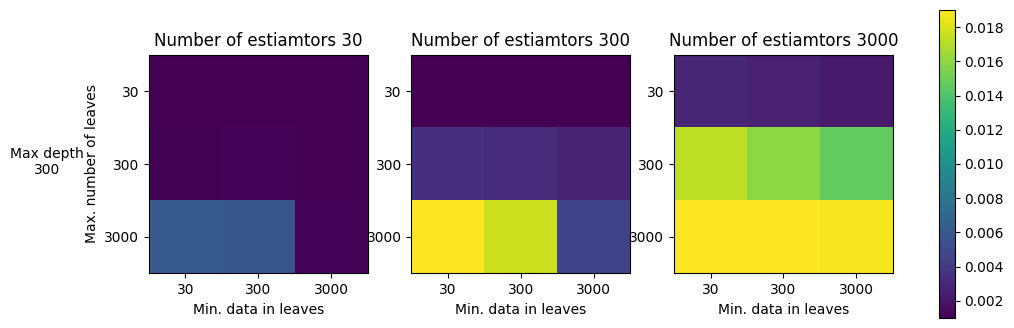

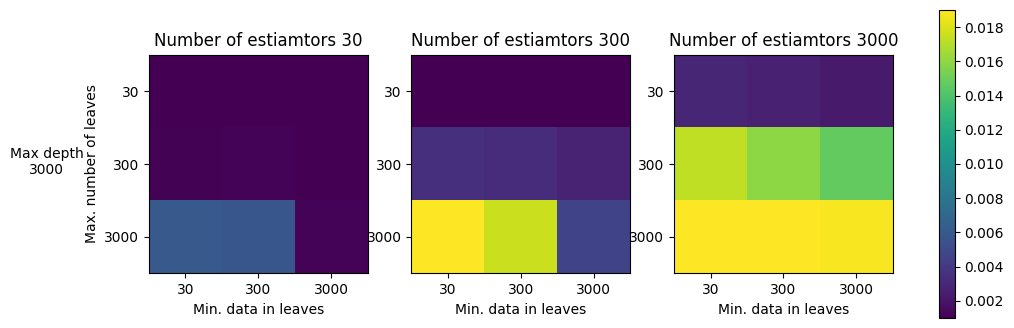

In [48]:
### cicliamo sulle max_depth
for i,depth in enumerate(list_max_depths):
    ### definiamo la figure in cui plotteremo le matrici, che saranno plottate a gruppi di tre
    fig, axs = plt.subplots(1, 3, figsize = (12,4))
    # Titolo generale per tutte le matrici sul lato sinistro
    if depth == -1 : depth_label = 'No max\n depth '
    else : depth_label = f'Max depth\n{depth}' 
    fig.text(0.04, 0.5, depth_label, va='center', ha='center', rotation='horizontal')
    ### cicliamo sul numero di estimatori
    for j,n_estimators in enumerate(list_n_estimators):
        ### definiamo la matrice vuota da plottare
        delta_roc_area_matrix = np.zeros((len(list_num_leaves),len(list_min_data_in_leaves)))
        ### cicliamo sul numero di final leaves
        for k,num_leaves in enumerate(list_num_leaves):
            ### cicliamo sul numero di min data in leaves
            for l,min_data in enumerate(list_min_data_in_leaves):
                ### definiamo il path del file con l'area della roc del test set
                file_path_test =path_dir+'/n_estimators_'+str(n_estimators)+'_max_depth_'+str(depth)+'_n_leaves_'+str(num_leaves)+'_min_data_leaf_'+str(min_data)+'/n_estimators_'+str(n_estimators)+'_max_depth_'+str(depth)+'_n_leaves_'+str(num_leaves)+'_min_data_leaf_'+str(min_data)+'_ROC_area_probabilities_1.txt'
                ### questi file sono di una riga che termina con un float che è l'area della roc
                with open(file_path_test, 'r') as f:
                    line_test = f.readline()
                ### stessa cosa con l'area del train set
                file_path_train =path_dir+'/n_estimators_'+str(n_estimators)+'_max_depth_'+str(depth)+'_n_leaves_'+str(num_leaves)+'_min_data_leaf_'+str(min_data)+'/n_estimators_'+str(n_estimators)+'_max_depth_'+str(depth)+'_n_leaves_'+str(num_leaves)+'_min_data_leaf_'+str(min_data)+'_train_ROC_area_probabilities_1.txt'
                ### questi file sono di una riga che termina con un float che è l'area della roc
                with open(file_path_train, 'r') as f:
                    line_train = f.readline()
                ### salviamo il valore della roc nella matrice
                delta_roc_area_matrix[k][l] = float(line_train.split()[-1]) - float(line_test.split()[-1])
        cax = axs[j].imshow(delta_roc_area_matrix, vmin = 0.001, vmax = 0.019, cmap='viridis')
        axs[j].set_xticks([0,1,2])
        axs[j].set_xticklabels(['30', '300', '3000'])
        axs[j].set_yticks([0,1,2])
        axs[j].set_yticklabels(['30', '300', '3000'])
        axs[j].set_xlabel('Min. data in leaves')
        axs[0].set_ylabel('Max. number of leaves')
        axs[j].set_title(f'Number of estiamtors {n_estimators}')
    fig.colorbar(cax, ax = axs)
    fig.savefig('/home/private/Hepd/Dataset_4/models_evaluation/bdt/delta_performance_depth_'+str(depth)+'.jpg')